In [355]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [440]:
train = pd.read_csv('laptop_data.csv')

In [441]:
train.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [442]:
train['Ram'] = train['Ram'].apply(lambda x:x.replace("GB",""))
train['Weight'] = train['Weight'].apply(lambda x:x.replace("kg",""))

In [443]:
train[train['Memory'] == '1.0TB Hybrid']['Memory']

151     1.0TB Hybrid
1010    1.0TB Hybrid
1135    1.0TB Hybrid
1158    1.0TB Hybrid
1176    1.0TB Hybrid
1258    1.0TB Hybrid
1266    1.0TB Hybrid
1280    1.0TB Hybrid
1294    1.0TB Hybrid
Name: Memory, dtype: object

In [444]:
train.drop(train[train['Memory'] == '1.0TB Hybrid']['Memory'].index[0:10],inplace=True)

In [445]:
train.drop([976],inplace=True)

In [446]:
train['Memory'].apply(lambda x:"".join(x))

0                 128GB SSD
1       128GB Flash Storage
2                 256GB SSD
3                 512GB SSD
4                 256GB SSD
               ...         
1298              128GB SSD
1299              512GB SSD
1300     64GB Flash Storage
1301                1TB HDD
1302              500GB HDD
Name: Memory, Length: 1293, dtype: object

In [447]:
train['Ram'] = train['Ram'].astype('int32')
train['Weight'] = train['Weight'].astype('float64')

In [448]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1293 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1293 non-null   int64  
 1   Company           1293 non-null   object 
 2   TypeName          1293 non-null   object 
 3   Inches            1293 non-null   float64
 4   ScreenResolution  1293 non-null   object 
 5   Cpu               1293 non-null   object 
 6   Ram               1293 non-null   int32  
 7   Memory            1293 non-null   object 
 8   Gpu               1293 non-null   object 
 9   OpSys             1293 non-null   object 
 10  Weight            1293 non-null   float64
 11  Price             1293 non-null   float64
dtypes: float64(3), int32(1), int64(1), object(7)
memory usage: 126.3+ KB


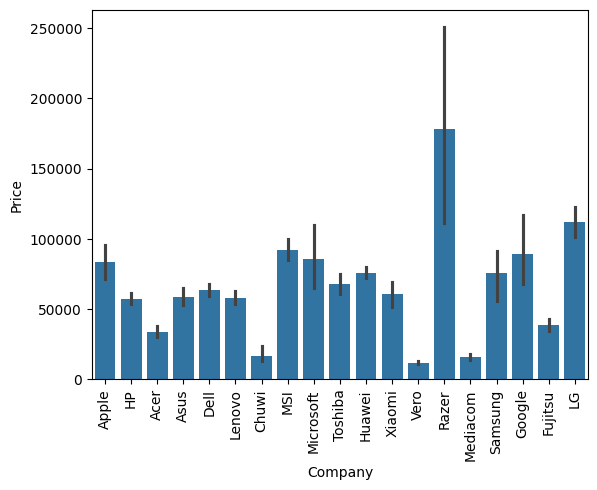

In [449]:
sns.barplot(x=train['Company'],y=train['Price'])
plt.xticks(rotation='vertical')
plt.show()

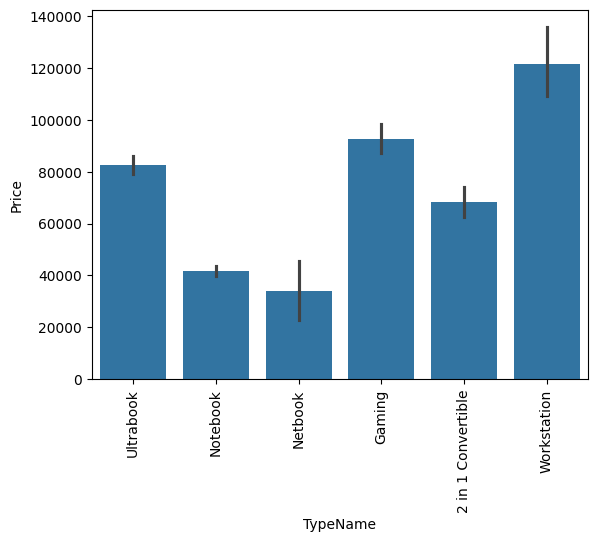

In [450]:
sns.barplot(x=train['TypeName'],y=train['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [451]:
train['Touchscreen'] = train['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
train['IPS'] = train['ScreenResolution'].apply(lambda x:1 if 'IPS ' in x else 0)
train['Quad HD+'] = train['ScreenResolution'].apply(lambda x:1 if 'Quad HD+ ' in x else 0)

In [452]:
train['ScreenResolution'].value_counts()

Full HD 1920x1080                                498
1366x768                                         280
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

<Axes: xlabel='Touchscreen', ylabel='Price'>

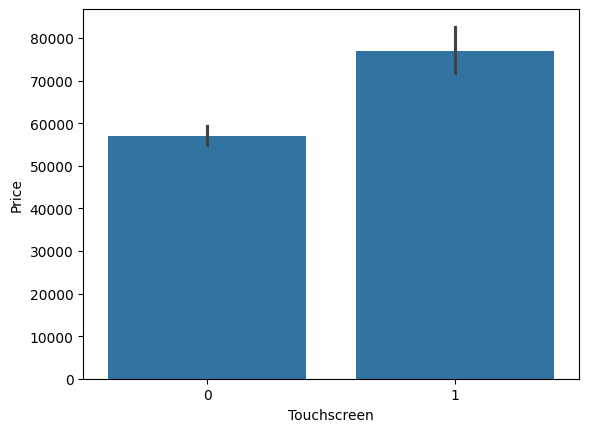

In [369]:
sns.barplot(x=train['Touchscreen'],y=train['Price'])

In [370]:
new = train['ScreenResolution'].str.split('x',n=1,expand=True)
train['x_res'] = new[0]
train['y_res'] = new[1]

In [371]:
train['x_res'] = train['x_res'].str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [372]:
train.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Quad HD+,x_res,y_res
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,0,2560,1600
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,1440,900
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,0,1920,1080
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,0,2880,1800
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,0,2560,1600


In [373]:
train['x_res'] = train['x_res'].astype('int')
train['y_res'] = train['y_res'].astype('int')

In [374]:
train['ppi'] = ((((train['x_res']**2) + (train['y_res']**2))*0.5)/train['Inches']).astype('float')

In [375]:
train.drop(['x_res', 'y_res', 'Inches'],axis=1,inplace=True)            

In [376]:
train.drop(['ScreenResolution'],axis=1,inplace=True)

In [377]:
train['cpu name'] = train['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [378]:
train['cpu name'].unique()

array(['Intel Core i5', 'Intel Core i7', 'AMD A9-Series 9420',
       'Intel Core i3', 'Intel Core M', 'Intel Atom x5-Z8350',
       'AMD E-Series E2-9000e', 'Intel Atom x5-Z8300',
       'AMD E-Series E2-6110', 'AMD A6-Series 9220', 'Intel Celeron Dual',
       'AMD Ryzen 1700', 'Intel Pentium Quad', 'Intel Atom x5-Z8550',
       'AMD FX 9830P', 'AMD E-Series 6110', 'Intel Xeon E3-1505M',
       'AMD E-Series 9000e', 'AMD A10-Series A10-9620P',
       'AMD A6-Series A6-9220', 'AMD A10-Series 9600P',
       'AMD A8-Series 7410', 'AMD A12-Series 9720P', 'Intel Celeron Quad',
       'AMD Ryzen 1600', 'AMD A10-Series 9620P', 'AMD E-Series 7110',
       'AMD A9-Series A9-9420', 'Intel Xeon E3-1535M',
       'AMD E-Series E2-9000', 'AMD A6-Series 7310', 'Intel Atom Z8350',
       'Intel Pentium Dual', 'AMD A12-Series 9700P', 'AMD A4-Series 7210',
       'AMD FX 8800P', 'Intel Atom X5-Z8350', 'Samsung Cortex A72&A53',
       'AMD E-Series 9000'], dtype=object)

In [379]:
def fetch_processor(text):
    if text == 'Intel Core i5' or text == 'Intel Core i7' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'AMD':
            return 'AMD'
        else:
            return 'Other Processors'

In [380]:
train['cpu brand'] = train['cpu name'].apply(fetch_processor)

In [382]:
train.drop(['cpu name'],axis=1,inplace=True)

In [383]:
train.drop(['Cpu'],axis=1,inplace=True)

In [384]:
train.head()

,Unnamed: 0,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Quad HD+,ppi,cpu brand
0,0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,0,342616.541353,Intel Core i5
1,1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,108406.015038,Intel Core i5
2,2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,0,155538.461538,Intel Core i5
3,3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,0,374493.506494,Intel Core i7
4,4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,0,342616.541353,Intel Core i5


In [385]:
train['Memory'] = train['Memory'].apply(lambda x:x.split())

In [386]:
train[train['Memory'] == '64GB Flash Storage +  1TB HDD']['Memory'].apply(lambda x:x.split())

Series([], Name: Memory, dtype: object)

In [387]:
def ssd(l):
    if 'SSD' in l:
        return l[0:2]
    else:
        return []
def hdd(l):
    if 'HDD' in l:
        return l[-2:]
    else:
        return []
def flash(l):
    if 'Flash' in l:
        return l[0:2]
    else:
        return []

In [388]:
train['ssd'] = train['Memory'].apply(ssd)
train['hdd'] = train['Memory'].apply(hdd)
train['flash'] = train['Memory'].apply(flash)

In [389]:
train.head()

,Unnamed: 0,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Quad HD+,ppi,cpu brand,ssd,hdd,flash
0,0,Apple,Ultrabook,8,"[128GB, SSD]",Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,0,342616.541353,Intel Core i5,"[128GB, SSD]",[],[]
1,1,Apple,Ultrabook,8,"[128GB, Flash, Storage]",Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,108406.015038,Intel Core i5,[],[],"[128GB, Flash]"
2,2,HP,Notebook,8,"[256GB, SSD]",Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,0,155538.461538,Intel Core i5,"[256GB, SSD]",[],[]
3,3,Apple,Ultrabook,16,"[512GB, SSD]",AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,0,374493.506494,Intel Core i7,"[512GB, SSD]",[],[]
4,4,Apple,Ultrabook,8,"[256GB, SSD]",Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,0,342616.541353,Intel Core i5,"[256GB, SSD]",[],[]


In [390]:
def li(l):
    if len(l) != 0:
        return l[0]

In [391]:
train['SSD'] = train['ssd'].apply(li)
train['HDD'] = train['hdd'].apply(li)
train['FlashStorage'] = train['flash'].apply(li)

In [392]:
train.drop(['ssd','hdd','flash'],axis=1,inplace=True)

In [393]:
train['SSD'].replace(to_replace=[None],value='0',inplace=True)
train['SSD']

0       128GB
1           0
2       256GB
3       512GB
4       256GB
        ...  
1298    128GB
1299    512GB
1300        0
1301        0
1302        0
Name: SSD, Length: 1293, dtype: object

In [394]:
train['SSD'] = train['SSD'].apply(lambda x:x.replace('1TB','1000GB'))
train['SSD'] = train['SSD'].apply(lambda x:x.replace('GB',''))

In [395]:
train['HDD'].replace(to_replace=[None],value='0',inplace=True)
train['FlashStorage'].replace(to_replace=[None],value='0',inplace=True)

In [396]:
train['HDD'] = train['HDD'].apply(lambda x:x.replace('1TB','1000GB'))
train['HDD'] = train['HDD'].apply(lambda x:x.replace('2TB','1000GB'))
train['HDD'] = train['HDD'].apply(lambda x:x.replace('GB',''))
train['FlashStorage'] = train['FlashStorage'].apply(lambda x:x.replace('GB',''))

In [397]:
train['HDD'] = train['HDD'].apply(lambda x:x.replace('1.0TB','1000'))

In [398]:
train.sample(5)

,Unnamed: 0,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Quad HD+,ppi,cpu brand,SSD,HDD,FlashStorage
715,715,Lenovo,Notebook,8,"[256GB, SSD]",Nvidia GeForce 920MX,Windows 10,1.87,45664.6896,0,1,0,173314.285714,Intel Core i5,256,0,0
310,310,Lenovo,Notebook,8,"[256GB, SSD]",Intel HD Graphics 620,Windows 10,1.10,53226.7200,0,1,0,182436.090226,Intel Core i5,256,0,0
964,964,HP,Notebook,8,"[1TB, HDD]",Nvidia GeForce 930MX,Windows 10,2.04,45101.5200,0,0,0,78710.897436,Intel Core i5,0,1000,0
1028,1028,Dell,Ultrabook,8,"[256GB, SSD]",Intel HD Graphics 620,Windows 10,1.29,86526.7200,1,0,1,506766.917293,Intel Core i5,256,0,0
1044,1044,HP,Notebook,4,"[500GB, HDD]",Intel HD Graphics 520,Windows 10,1.54,53280.0000,0,0,0,173314.285714,Intel Core i5,0,500,0


In [399]:
train.drop(['Memory'],axis=1,inplace=True)

In [400]:
train['SSD'] = train['SSD'].astype('int')
train['HDD'] = train['HDD'].astype('int')
train['FlashStorage'] = train['FlashStorage'].astype('int')

In [401]:
train.drop(['FlashStorage'],axis=1,inplace=True)

In [402]:
train['GpuBrand'] = train['Gpu'].apply(lambda x:x.split()[0])

In [403]:
train.drop([1191],inplace=True)

In [404]:
train['GpuBrand'].value_counts()

Intel     720
Nvidia    398
AMD       174
Name: GpuBrand, dtype: int64

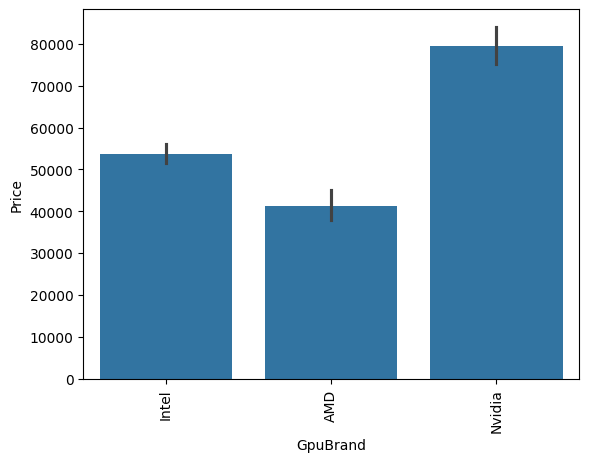

In [405]:
sns.barplot(x=train['GpuBrand'],y=train['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [406]:
train.head()

,Unnamed: 0,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Quad HD+,ppi,cpu brand,SSD,HDD,GpuBrand
0,0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,0,342616.541353,Intel Core i5,128,0,Intel
1,1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,108406.015038,Intel Core i5,0,0,Intel
2,2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,0,155538.461538,Intel Core i5,256,0,Intel
3,3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,0,374493.506494,Intel Core i7,512,0,AMD
4,4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,0,342616.541353,Intel Core i5,256,0,Intel


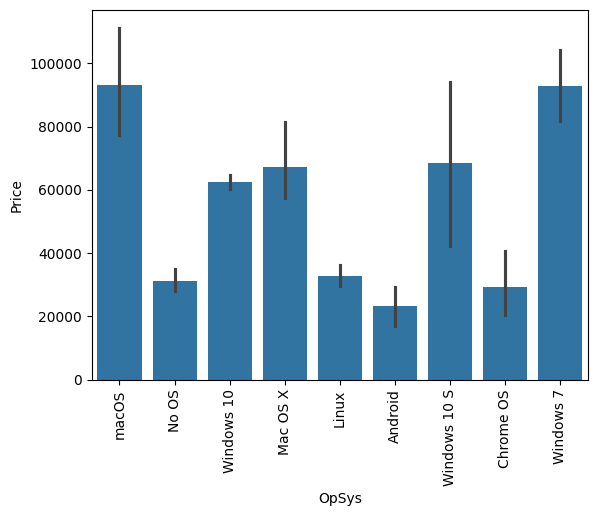

In [407]:
sns.barplot(x=train['OpSys'],y=train['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [408]:
def os(text):
    if text == 'Windows 10' or text == 'Windows 10 S' or text == 'Windows 7':
        return 'Windows'
    elif text.split()[0] == 'Mac OS X' or text == 'macOS':
        return 'Mac'
    else:
        return 'Others'

In [409]:
train['OpSys'] = train['OpSys'].apply(os)

In [410]:
train.head()

,Unnamed: 0,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Quad HD+,ppi,cpu brand,SSD,HDD,GpuBrand
0,0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,Mac,1.37,71378.6832,0,1,0,342616.541353,Intel Core i5,128,0,Intel
1,1,Apple,Ultrabook,8,Intel HD Graphics 6000,Mac,1.34,47895.5232,0,0,0,108406.015038,Intel Core i5,0,0,Intel
2,2,HP,Notebook,8,Intel HD Graphics 620,Others,1.86,30636.0000,0,0,0,155538.461538,Intel Core i5,256,0,Intel
3,3,Apple,Ultrabook,16,AMD Radeon Pro 455,Mac,1.83,135195.3360,0,1,0,374493.506494,Intel Core i7,512,0,AMD
4,4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,Mac,1.37,96095.8080,0,1,0,342616.541353,Intel Core i5,256,0,Intel


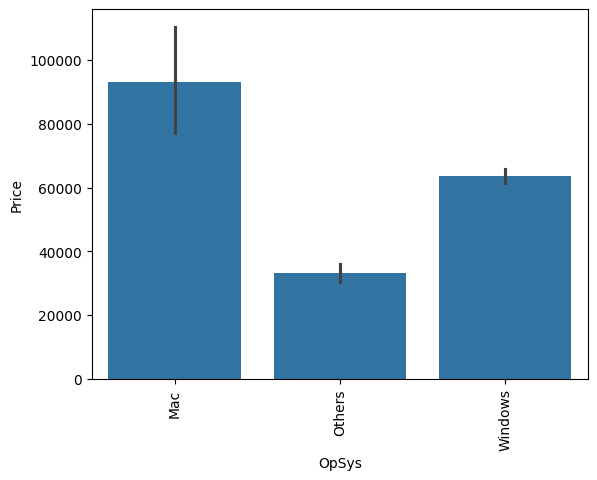

In [411]:
sns.barplot(x=train['OpSys'],y=train['Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\a\AppData\Local\Temp\ipykernel_10444\3675322483.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr())


<Axes: >

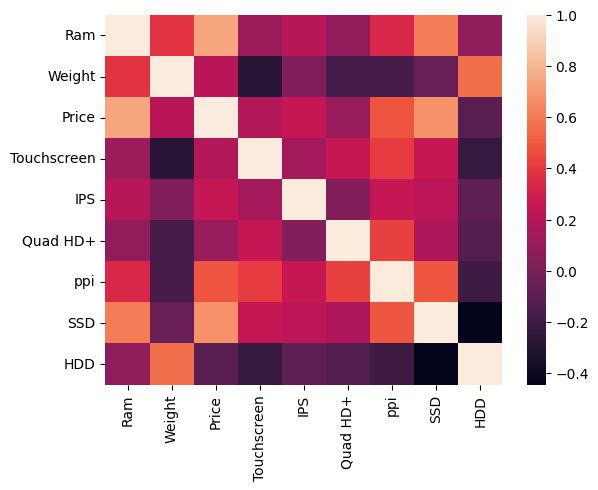

In [412]:
train.drop(['Unnamed: 0'],axis=1,inplace=True)
sns.heatmap(train.corr())

C:\Users\a\AppData\Local\Temp\ipykernel_10444\1795695247.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(train['Price']))


<Axes: xlabel='Price', ylabel='Density'>

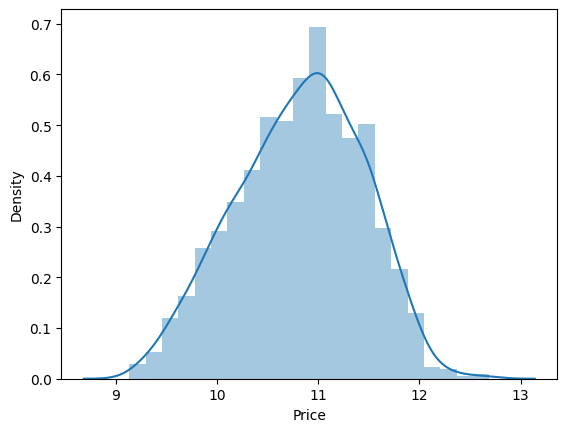

In [413]:
sns.distplot(np.log(train['Price']))

In [414]:
train.drop(['Gpu'],axis=1,inplace=True)

In [415]:
y = np.log(train['Price'])
X = train.drop(['Price'],axis=1)

In [416]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [417]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,VotingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [418]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1033 entries, 1070 to 1129
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1033 non-null   object 
 1   TypeName     1033 non-null   object 
 2   Ram          1033 non-null   int32  
 3   OpSys        1033 non-null   object 
 4   Weight       1033 non-null   float64
 5   Touchscreen  1033 non-null   int64  
 6   IPS          1033 non-null   int64  
 7   Quad HD+     1033 non-null   int64  
 8   ppi          1033 non-null   float64
 9   cpu brand    1033 non-null   object 
 10  SSD          1033 non-null   int32  
 11  HDD          1033 non-null   int32  
 12  GpuBrand     1033 non-null   object 
dtypes: float64(2), int32(3), int64(3), object(5)
memory usage: 100.9+ KB


In [459]:
step1 = ColumnTransformer([
    ('ohe',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,9,12])
],remainder='passthrough')

rf = RandomForestRegressor()
gbr = GradientBoostingRegressor()
xgb = XGBRegressor()
et = ExtraTreeRegressor()
step2 = XGBRegressor()
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print('r2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

r2 score 0.9022803900116046
MAE 0.1494114918096301


In [420]:
np.exp(0.16)

1.1735108709918103

In [421]:
X_train.head(5)

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,IPS,Quad HD+,ppi,cpu brand,SSD,HDD,GpuBrand
1070,Dell,Notebook,4,Windows,2.06,0,0,0,78710.897436,Intel Core i3,0,500,Intel
967,HP,Notebook,4,Windows,2.04,0,0,0,155538.461538,Intel Core i3,0,500,Intel
804,Dell,Netbook,4,Windows,1.63,0,0,0,105852.586207,Other Processors,128,0,Intel
340,Dell,Notebook,4,Others,2.20,0,0,0,78710.897436,Other Processors,0,500,Intel
668,Toshiba,Notebook,8,Windows,2.00,0,1,0,155538.461538,Intel Core i5,256,0,Intel


In [422]:
import pickle
pickle.dump(train,open('train.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [457]:
train['Ram'].value_counts().sort_index().index

Int64Index([2, 4, 6, 8, 12, 16, 24, 32, 64], dtype='int64')

In [469]:
x= '1920x2180'
x.split('x')[0]

'1920'

In [464]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1033 entries, 1070 to 1129
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1033 non-null   object 
 1   TypeName     1033 non-null   object 
 2   Ram          1033 non-null   int32  
 3   OpSys        1033 non-null   object 
 4   Weight       1033 non-null   float64
 5   Touchscreen  1033 non-null   int64  
 6   IPS          1033 non-null   int64  
 7   Quad HD+     1033 non-null   int64  
 8   ppi          1033 non-null   float64
 9   cpu brand    1033 non-null   object 
 10  SSD          1033 non-null   int32  
 11  HDD          1033 non-null   int32  
 12  GpuBrand     1033 non-null   object 
dtypes: float64(2), int32(3), int64(3), object(5)
memory usage: 100.9+ KB
